# 2. Evaluation of final performance

This file evaluates the final performance of our models on the test data based on MSE, MAE and R^2. We want to filter for different experimental parameter combinations and the plots are displayed by using the difference of scores when comparing stratified vs. unstratified models.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import json
# remove waringns
import warnings
warnings.filterwarnings("ignore")


from utils_evaluation import flatten_data, generate_hyperparameter_combinations_dict

In [2]:
def read_data(json_path):
    json_files = os.listdir(json_path)
    data = []
    for file in json_files:
        with open(json_path + file) as f:
            data_new = json.load(f)
            data = data + data_new
    # flatten dictionary and convert to dataframe
    data_all_flatten, keys_dic = flatten_data(data)
    data = pd.DataFrame(data_all_flatten)
    return data


In [3]:
json_path ="../results/rf/"
json_path_xgb = "../results/xgb/"

data_rf = read_data(json_path)
data_xgb = read_data(json_path_xgb)

print('\nData Loading from json file:')
print('Loaded Random Forest data from json file: shape', data_rf.shape)
print('Loaded XGBoost data from json file: shape', data_xgb.shape)


Data Loading from json file:
Loaded Random Forest data from json file: shape (4800, 75)
Loaded XGBoost data from json file: shape (4800, 87)


In [ ]:
'''variables: 'unstratified_results_train r2', 'unstratified_results_test r2',
       'unstratified_results_train mse', 'unstratified_results_test mse',
       'unstratified_results_train mae', 'unstratified_results_test mae',
       'stratified_results_train r2', 'stratified_results_test r2',
       'stratified_results_train mse', 'stratified_results_test mse',
       'stratified_results_train mae', 'stratified_results_test mae','''

In [4]:
data_rf.columns

Index(['model_info_model', 'model_info_n_train', 'model_info_n_test',
       'model_info_n_features', 'model_info_noise',
       'model_info_transformation', 'model_info_group_size',
       'model_info_n_folds', 'model_info_n_iter', 'model_info_n_repetitions',
       'model_info_scoring', 'model_info_n_jobs', 'model_info_json_file',
       'repetition', 'random_state', 'hyperparameters_same',
       'unstratified_results_train r2', 'unstratified_results_test r2',
       'unstratified_results_train mse', 'unstratified_results_test mse',
       'unstratified_results_train mae', 'unstratified_results_test mae',
       'stratified_results_train r2', 'stratified_results_test r2',
       'stratified_results_train mse', 'stratified_results_test mse',
       'stratified_results_train mae', 'stratified_results_test mae',
       'cv_unstratified_iterations_mean_fit_time',
       'cv_unstratified_iterations_std_fit_time',
       'cv_unstratified_iterations_mean_score_time',
       'cv_unstratifie

## 2.1 Final Performance of Random Forest

In [69]:
data_rf_final = data_rf[['model_info_model', 'model_info_n_train', 'model_info_n_test',
       'model_info_n_features', 'model_info_noise',
       'model_info_transformation', 'model_info_group_size',
       'model_info_n_folds', 'model_info_n_iter', 'model_info_n_repetitions',
       'model_info_scoring', 'model_info_n_jobs', 'model_info_json_file',
       'repetition', 'random_state', 'hyperparameters_same',
       'unstratified_results_train r2', 'unstratified_results_test r2',
       'unstratified_results_train mse', 'unstratified_results_test mse',
       'unstratified_results_train mae', 'unstratified_results_test mae',
       'stratified_results_train r2', 'stratified_results_test r2',
       'stratified_results_train mse', 'stratified_results_test mse',
       'stratified_results_train mae', 'stratified_results_test mae']]

In [70]:
data_rf_final.shape

(4800, 28)

In [71]:
data_rf_final['strat-unstrat_test_mse'] = data_rf_final['stratified_results_test mse'] - data_rf_final['unstratified_results_test mse']
data_rf_final['strat-unstrat_test_r2'] = data_rf_final['stratified_results_test r2'] - data_rf_final['unstratified_results_test r2']
data_rf_final['strat-unstrat_test_mae'] = data_rf_final['stratified_results_test mae'] - data_rf_final['unstratified_results_test mae'] 
data_rf_final.shape

(4800, 31)

In [72]:
data_rf_final[['strat-unstrat_test_mse', 'stratified_results_test mse', 'unstratified_results_test mse']].head()

,strat-unstrat_test_mse,stratified_results_test mse,unstratified_results_test mse
0,0.172560,5.151931,4.979371
1,0.000000,4.305234,4.305234
2,-0.074262,4.722268,4.796530
3,-0.294275,5.231037,5.525313
4,0.036031,5.029920,4.993889


In [73]:
data_rf_final['combined_info'] = data_rf_final['model_info_model'] + '_' + data_rf_final['model_info_transformation'] + '_'+ data_rf_final['model_info_n_train'].astype(str) + '_' + data_rf_final['model_info_noise'].astype(str) + '_' + data_rf_final['model_info_group_size'].astype(str)


In [77]:
print(data_rf_final.shape)
data_rf_final.head()[['combined_info', 'strat-unstrat_test_mse', 'strat-unstrat_test_r2', 'strat-unstrat_test_mae','hyperparameters_same'
       #'unstratified_results_train r2', 'unstratified_results_test r2',
       #'unstratified_results_train mse', 'unstratified_results_test mse',
       #'unstratified_results_train mae', 'unstratified_results_test mae',
       #'stratified_results_train r2', 'stratified_results_test r2',
       #'stratified_results_train mse', 'stratified_results_test mse',
       #'stratified_results_train mae', 'stratified_results_test mae'
                      ]]

(4800, 32)


,combined_info,strat-unstrat_test_mse,strat-unstrat_test_r2,strat-unstrat_test_mae,hyperparameters_same
0,rf_identity_200_0_5,0.172560,-0.007227,0.021279,False
1,rf_identity_200_0_5,0.000000,0.000000,0.000000,True
2,rf_identity_200_0_5,-0.074262,0.003110,-0.010299,False
3,rf_identity_200_0_5,-0.294275,0.012325,-0.060274,False
4,rf_identity_200_0_5,0.036031,-0.001509,0.007784,False


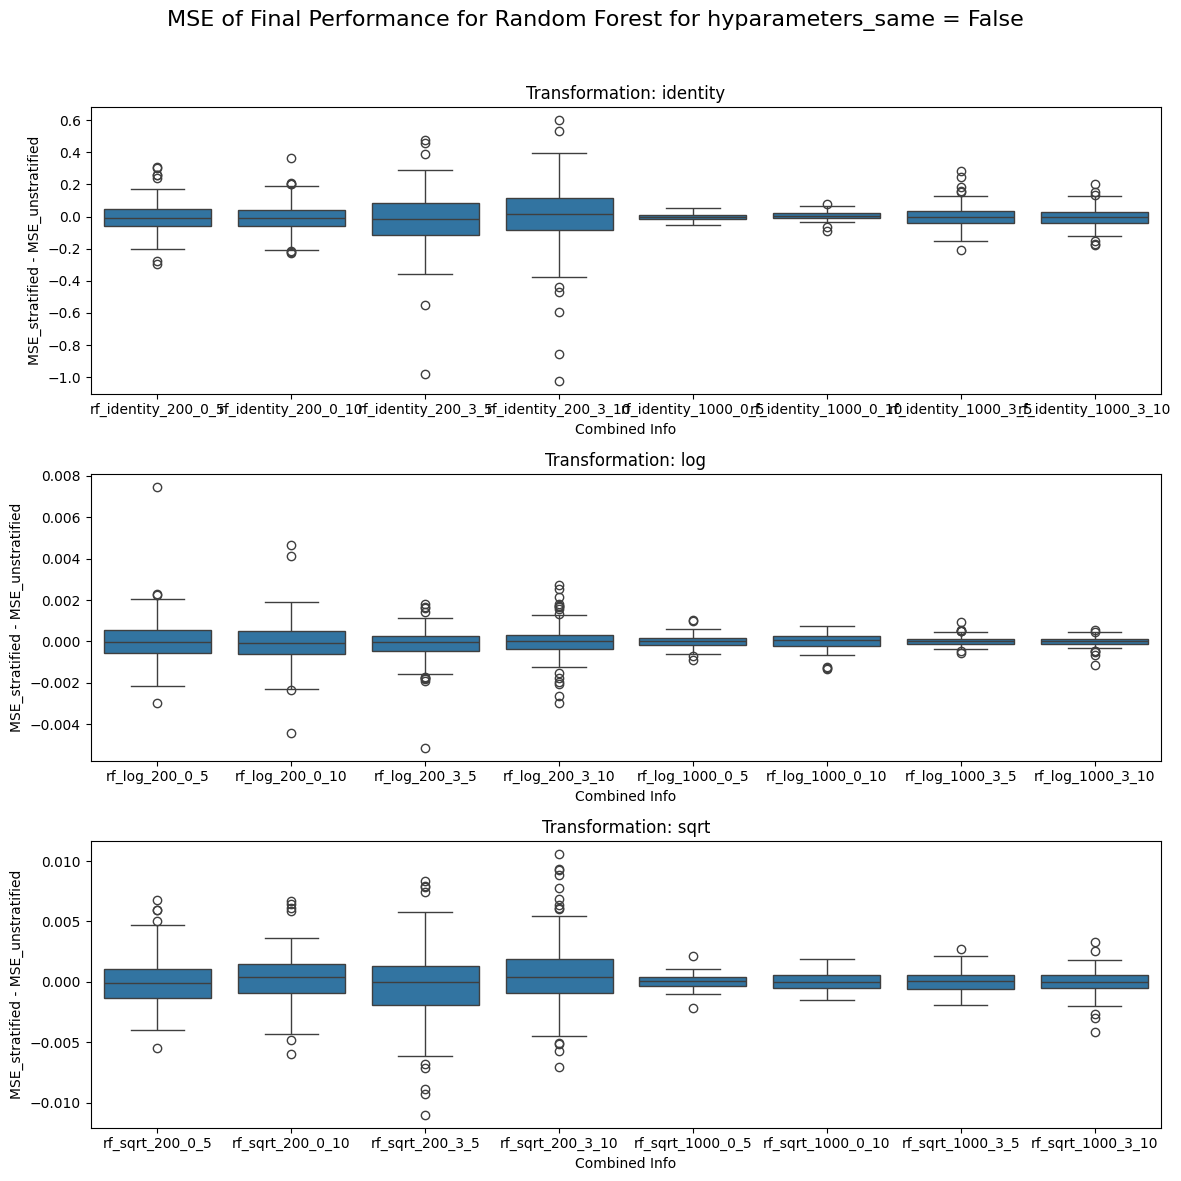

In [82]:

def plot_final_performance_diff(data, params, nrows, ncols, histo = False):
    # Create a grid for subplots
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 12))
    fig.suptitle("MSE of Final Performance for Random Forest for hyparameters_same = False", fontsize=16)

    # Flatten the array of subplots
    axes = axes.flatten()

    for i, hyperparam in enumerate(params):

        # Select the current subplot
        ax = axes[i]
        if histo:
            # Create a grouped histogram for the current hyperparameter
            #sns.displot(data_plot, x="Value", hue="Hyperparameter", #multiple="stack", 
            #             ax=ax, bins=30, kde=True, stat= "density")
            plt.hist(data[f'unstratified_best_params_{hyperparam}'], bins=30, alpha=0.5, label="Unstratified", ax=ax)
            plt.hist(data[f'stratified_best_params_{hyperparam}'], bins=30, alpha=0.5, label="Stratified", ax=ax)
            # Add labels and title to the subplot
            ax.set_xlabel(hyperparam)
            ax.set_ylabel("Count")
            ax.set_title(f"Hyperparameter: {hyperparam}")
        else:
            # Create a grouped barplot for the current hyperparameterplt.figure(figsize=(16, 8))
            sns.boxplot(x='combined_info', y='strat-unstrat_test_mse', data=data_rf_final[(data_rf_final['hyperparameters_same'] == False) & (data_rf_final['model_info_transformation'] == hyperparam)], ax=ax)
            #ax.set_xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

            # Add labels and title to the subplot
            ax.set_xlabel("Combined Info")
            ax.set_ylabel("MSE_stratified - MSE_unstratified")
            ax.set_title(f"Transformation: {hyperparam}")

    # Adjust layout and show the plot
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

# Example usage
hyperparams_list = ['identity', 'log', 'sqrt']
plot_final_performance_diff(data_rf_final, hyperparams_list, nrows=3, ncols=1)

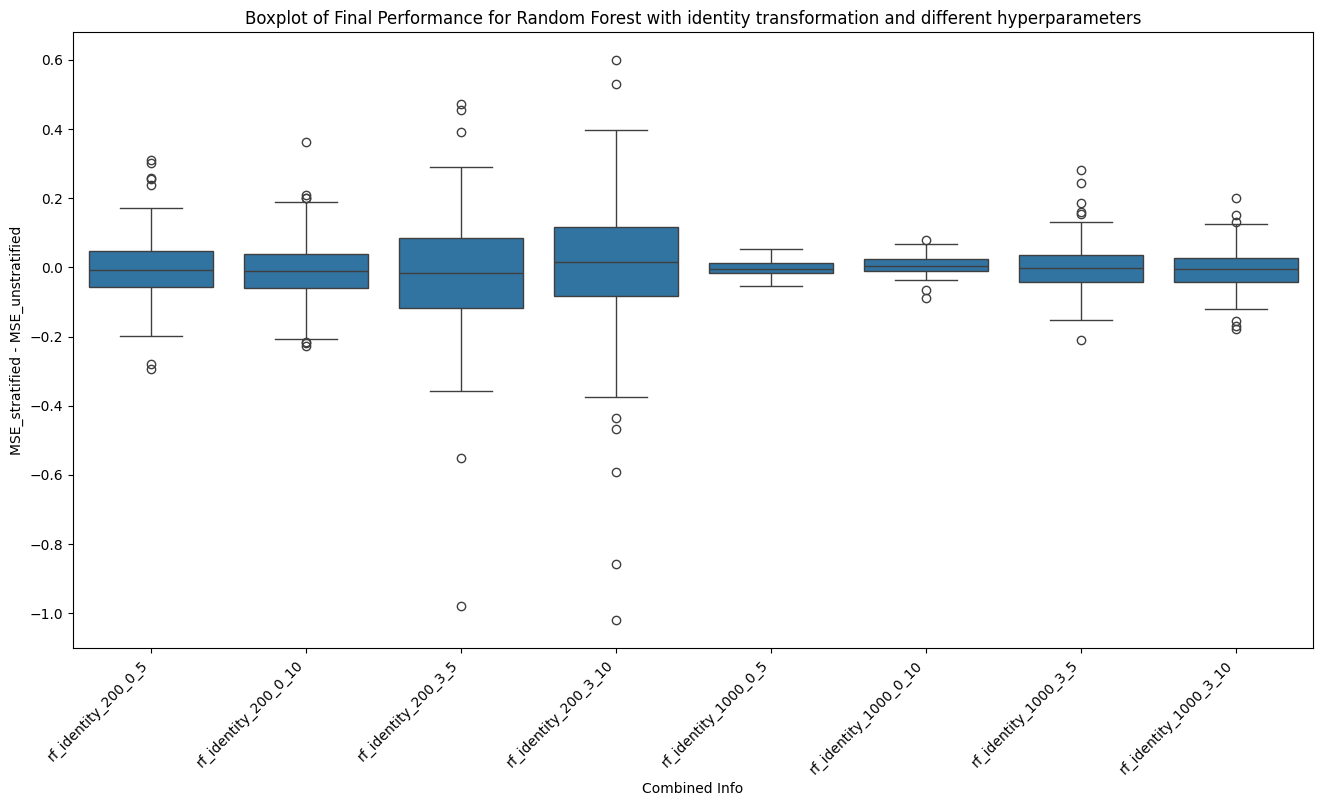

In [75]:
# Create a boxplot
plt.figure(figsize=(16, 8))
sns.boxplot(x='combined_info', y='strat-unstrat_test_mse', data=data_rf_final[(data_rf_final['hyperparameters_same'] == False) & (data_rf_final['model_info_transformation'] == 'identity')])
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.title('Boxplot of Final Performance for Random Forest with identity transformation and different hyperparameters')
plt.xlabel('Combined Info')
plt.ylabel('MSE_stratified - MSE_unstratified')
#plt.legend(title='Hyperparameters Same', loc='upper right')
plt.show()

In [83]:
data_rf_final.head()

,model_info_model,model_info_n_train,model_info_n_test,model_info_n_features,model_info_noise,model_info_transformation,model_info_group_size,model_info_n_folds,model_info_n_iter,model_info_n_repetitions,...,stratified_results_train r2,stratified_results_test r2,stratified_results_train mse,stratified_results_test mse,stratified_results_train mae,stratified_results_test mae,strat-unstrat_test_mse,strat-unstrat_test_r2,strat-unstrat_test_mae,combined_info
0,rf,200,100000,8,0,identity,5,5,200,20,...,0.961958,0.784224,0.873918,5.151931,0.763008,1.800024,0.172560,-0.007227,0.021279,rf_identity_200_0_5
1,rf,200,100000,8,0,identity,5,5,200,20,...,0.967045,0.819686,0.814824,4.305234,0.712869,1.653081,0.000000,0.000000,0.000000,rf_identity_200_0_5
2,rf,200,100000,8,0,identity,5,5,200,20,...,0.973786,0.802220,0.623847,4.722268,0.626467,1.735062,-0.074262,0.003110,-0.010299,rf_identity_200_0_5
3,rf,200,100000,8,0,identity,5,5,200,20,...,0.965963,0.780911,0.742666,5.231037,0.690719,1.854179,-0.294275,0.012325,-0.060274,rf_identity_200_0_5
4,rf,200,100000,8,0,identity,5,5,200,20,...,0.968525,0.789335,0.763924,5.029920,0.702668,1.774595,0.036031,-0.001509,0.007784,rf_identity_200_0_5


In [90]:
data_long = pd.melt(data_rf_final[['stratified_results_test mse', 'unstratified_results_test mse',
                                  'model_info_transformation', 'hyperparameters_same', 'combined_info']],
    id_vars=['combined_info', 'model_info_transformation', 'hyperparameters_same'], 
                                                value_vars= ['stratified_results_test mse', 'unstratified_results_test mse'], 
                                                var_name='Stratification', value_name= "Final Performance MSE")

In [91]:
data_long

,combined_info,model_info_transformation,hyperparameters_same,Stratification,Final Performance MSE
0,rf_identity_200_0_5,identity,False,stratified_results_test mse,5.151931
1,rf_identity_200_0_5,identity,True,stratified_results_test mse,4.305234
2,rf_identity_200_0_5,identity,False,stratified_results_test mse,4.722268
3,rf_identity_200_0_5,identity,False,stratified_results_test mse,5.231037
4,rf_identity_200_0_5,identity,False,stratified_results_test mse,5.029920
...,...,...,...,...,...
9595,rf_sqrt_1000_3_10,sqrt,True,unstratified_results_test mse,0.159447
9596,rf_sqrt_1000_3_10,sqrt,True,unstratified_results_test mse,0.163255
9597,rf_sqrt_1000_3_10,sqrt,True,unstratified_results_test mse,0.158306
9598,rf_sqrt_1000_3_10,sqrt,False,unstratified_results_test mse,0.160126


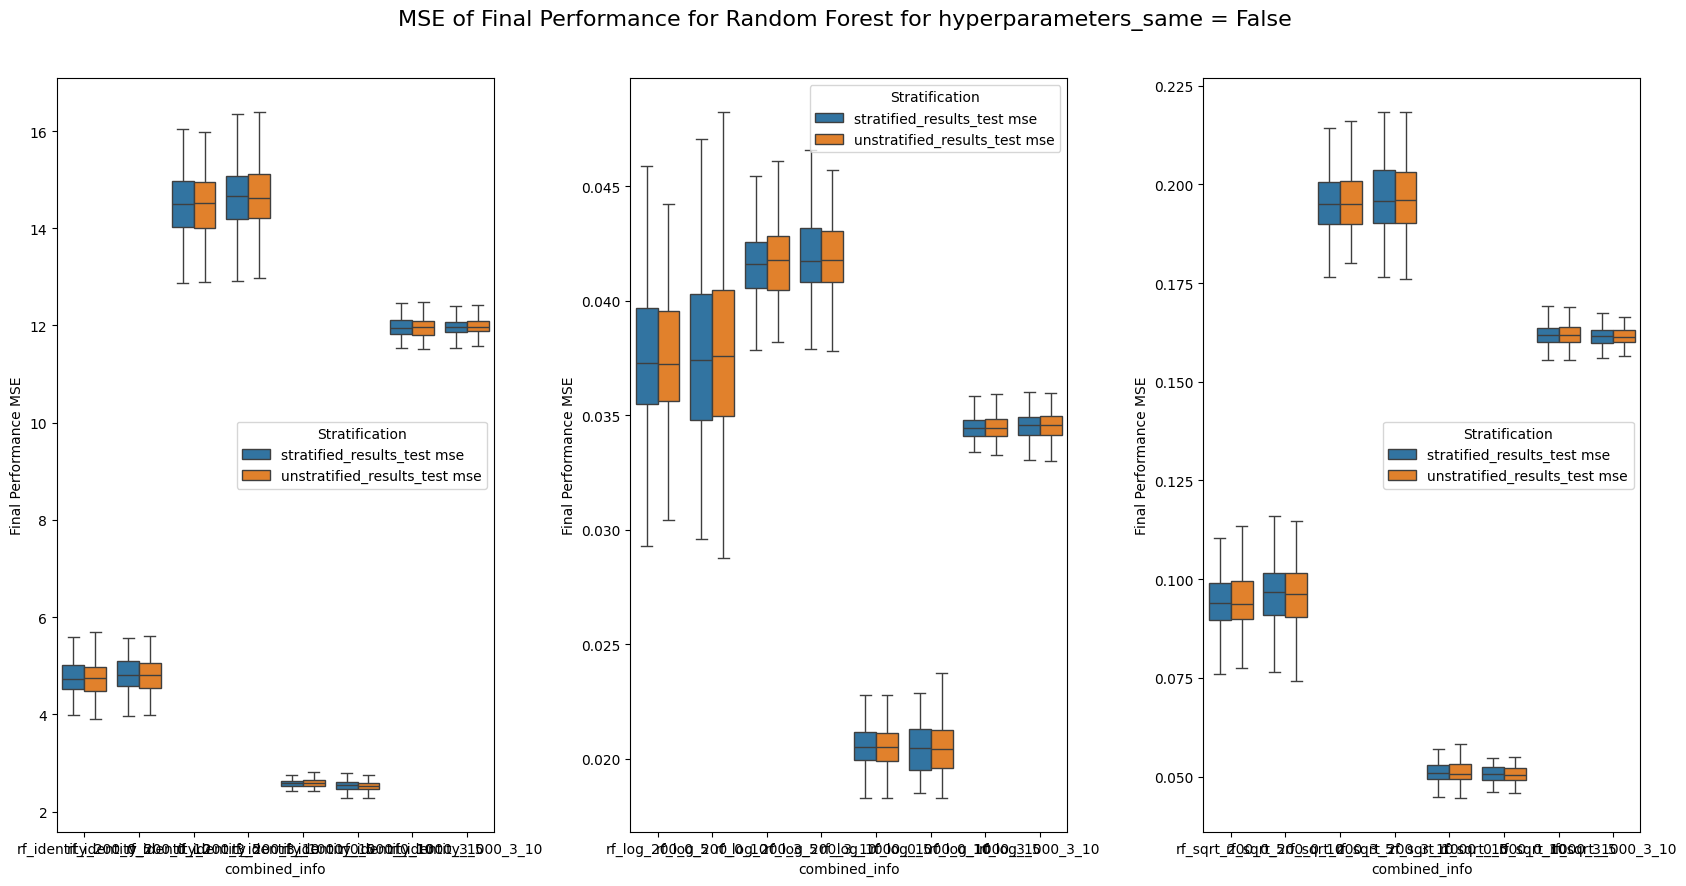

In [99]:
def plot_final_performance(data, params, nrows, ncols):
    # Create a grid for subplots
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(17, 9))
    fig.suptitle("MSE of Final Performance for Random Forest for hyperparameters_same = False", fontsize=16)

    # Flatten the array of subplots
    axes = axes.flatten()

    for i, hyperparam in enumerate(params):

        # Select the current subplot
        ax = axes[i]
        sns.boxplot(x= data['combined_info'][(data['model_info_transformation'] == hyperparam) & (data['hyperparameters_same'] == False)], 
                        y= data['Final Performance MSE'], 
                        #data = data[data['model_info_transformation'] == hyperparam],
                        hue= data_long['Stratification'],   
                        showfliers=False,
                        ax=ax)
 
            #ax.set_
    # Adjust layout and show the plot
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

# Example usage
hyperparams_list = ['identity', 'log', 'sqrt']
plot_final_performance(data_long, hyperparams_list, nrows=1, ncols=3)

In [57]:
def plot_eval(value_vars , value_name, data, model_vars_title, nrows, ncols, transformations = 'None', model = 'None', measure='MSE'):
        '''
        value_vars: list of strings, names of columns to be plotted for stratified and unstratified ['error_estimator_mean_stratified', 'error_estimator_mean_unstratified']. 
                        Important: stratified and unstratified must be written in the end after '_' otherwise automatic labeling won't work and you'll get an error
                        Important: stratifed first element, unstratified second element
        value_name: string, name of the value variable to be plotted. Basically name of value_vars that is plotted on the y-axis
        differences_table_all: pd.DataFrame, table of differences in mean and sd of stratified and unstratified , output of function with plots
        '''
        differences_table_all = pd.DataFrame()
        if model == 'rf':
                model_name = 'Random Forest'
        elif model == 'xgb':
                model_name = 'XGBoost'
        fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(17, 9))
        fig.suptitle(f"{measure} of Final Performance for {model_name}", fontsize=16)
        # Flatten the array of subplots
        axes = axes.flatten()

        for i, transformation in enumerate(transformations):
                data_i = data[data['model_info_transformation'] == transformation]
                # make data long
                data_long = data_i.melt(id_vars=['param_model'], 
                                                        value_vars= value_vars , 
                                                        var_name='Stratification', value_name= value_name)

                # definer ordering of boxplots
                filtered_data = data_long[data_long['Stratification'] ==  value_vars[1]]
                mean_intersection = filtered_data.groupby(['param_model'])[value_name].mean().reset_index().sort_values(by= value_name, ascending=False)

                ### Deacreptives
                descriptives = data_long.groupby(['param_model', 'Stratification']).describe()
                
                keys = descriptives[value_name]['mean'].index

                # descriptives['Intesection']['count'].values  # check N per boxplot
                descriptives_table = pd.DataFrame({'Experimental Hyperparameter Combination': keys.get_level_values('param_model'), 
                                                        'Stratification': keys.get_level_values('Stratification').str.rsplit('_', n=1).str[-1],

                                                        'Mean': descriptives[value_name]['mean'].values, 
                                                        'SD': descriptives[value_name]['std'].values})
                difference_mean =  descriptives_table[descriptives_table['Stratification']==  'stratified']['Mean'].values - descriptives_table[descriptives_table['Stratification']==  'unstratified']['Mean'].values
                difference_sd =  descriptives_table[descriptives_table['Stratification']==  'stratified']['SD'].values - descriptives_table[descriptives_table['Stratification']==  'unstratified']['SD'].values
                differences = pd.DataFrame({'Experimental Hyperparameter Combination': keys.get_level_values('param_model').unique(), 
                                                        'Difference Mean': difference_mean, 
                                                        'Difference SD': difference_sd})
                differences_table_all = pd.concat([differences_table_all, differences])


                ### Plot


                

                # Select the current subplot
                ax = axes[i]
                sns.boxplot(x=data_long['param_model'], 
                                y= data_long[value_name], 
                                hue= data_long['Stratification'],  palette={value_vars[0]: '#990073', 
                                value_vars[1]: 'darkgreen'}, 
                                showfliers=False, # hide outliers
                                order = list(mean_intersection['param_model']),
                                ax=ax)
                ax.set_xticklabels(ax.get_xticklabels(), rotation=45)  # rotate x labels by 90 degrees
                ax.set_ylabel(value_name)
                ax.set_xlabel('')
                legend = ax.legend()

                for j, label in enumerate(legend.get_texts()):
                        if label.get_text() == value_vars[0]:
                                label.set_text('Stratified')
                        elif label.get_text() == value_vars[1]:
                                label.set_text('Unstratified')        
                # Adjust layout and show the plot
                

                """
                plt.figure(figsize=(6, 3))  # Set the figure size to 10 inches by 6 inches
                if model == 'None' and transformation != 'None':
                        plt.title('Ordered and grouped boxplot: ' + transformation )
                elif transformation == 'None' and model != 'None':
                        plt.title('Ordered and grouped boxplot: ' + model)
                elif transformation != 'None' and model != 'None':
                        plt.title('Ordered and grouped boxplot: ' + transformation + ' & ' + model.upper())
                else:
                        plt.title('Ordered and grouped boxplot')
                sns.boxplot(x= data_long['param_model'], 
                                y= data_long[value_name], 
                                hue= data_long['Stratification'],  palette={value_vars[0]: '#990073', 
                                value_vars[1]: 'darkgreen'}, 
                                showfliers=False, # hide outliers
                                order = list(mean_intersection['param_model']))  #showmeans=True, meanline=True
                plt.xticks(rotation=90)  # rotate x labels by 90 degrees
                plt.ylabel(value_name)
                plt.xlabel('Hyperparameter Combination: '+ model_vars_title)
                legend = plt.legend()
                for i, label in enumerate(legend.get_texts()):
                        if label.get_text() == value_vars[0]:
                                label.set_text('Stratified')
                        elif label.get_text() == value_vars[1]:
                                label.set_text('Unstratified')
                plt.show()
                """
                differences.sort_values(by='Difference Mean', ascending=False, inplace=True)
                print(differences)

       
        fig.supxlabel('Hyperparameter Combination: ' + model_vars_title)

        plt.tight_layout(rect=[0, 0, 1, 0.96])
        plt.show()
        return differences_table_all

In [4]:
data = pd.concat([data_rf, data_xgb], axis=0, ignore_index=True)
original_shape = data.shape[0]

In [5]:
# creat unique identifier for plots
model_vars = ['model_info_transformation', 'model_info_n_train',	'model_info_noise',	'model_info_group_size']
model_vars_title =  [s.rsplit('_', 1)[-1] for s in model_vars]

data['param_model'] = data.loc[:, model_vars].astype(str).agg('_'.join, axis=1)
print('Shape of data', data.shape)
data['param_model'].head()

Shape of data (9600, 100)


0    identity_200_0_5
1    identity_200_0_5
2    identity_200_0_5
3    identity_200_0_5
4    identity_200_0_5
Name: param_model, dtype: object

  Experimental Hyperparameter Combination  Difference Mean  Difference SD
6                       identity_200_3_10         0.005001       0.016367
0                      identity_1000_0_10         0.002310       0.001592
3                       identity_1000_3_5         0.001733       0.007960
5                        identity_200_0_5        -0.000650      -0.007778
1                       identity_1000_0_5        -0.000841      -0.000440
4                       identity_200_0_10        -0.002960      -0.000466
2                      identity_1000_3_10        -0.005436      -0.003354
7                        identity_200_3_5        -0.013190      -0.001727
  Experimental Hyperparameter Combination  Difference Mean  Difference SD
5                             log_200_0_5     4.331385e-05   9.401129e-05
3                            log_1000_3_5     1.687900e-05  -2.211062e-05
2                           log_1000_3_10     9.138850e-06  -3.464774e-06
0                           log_1000_0

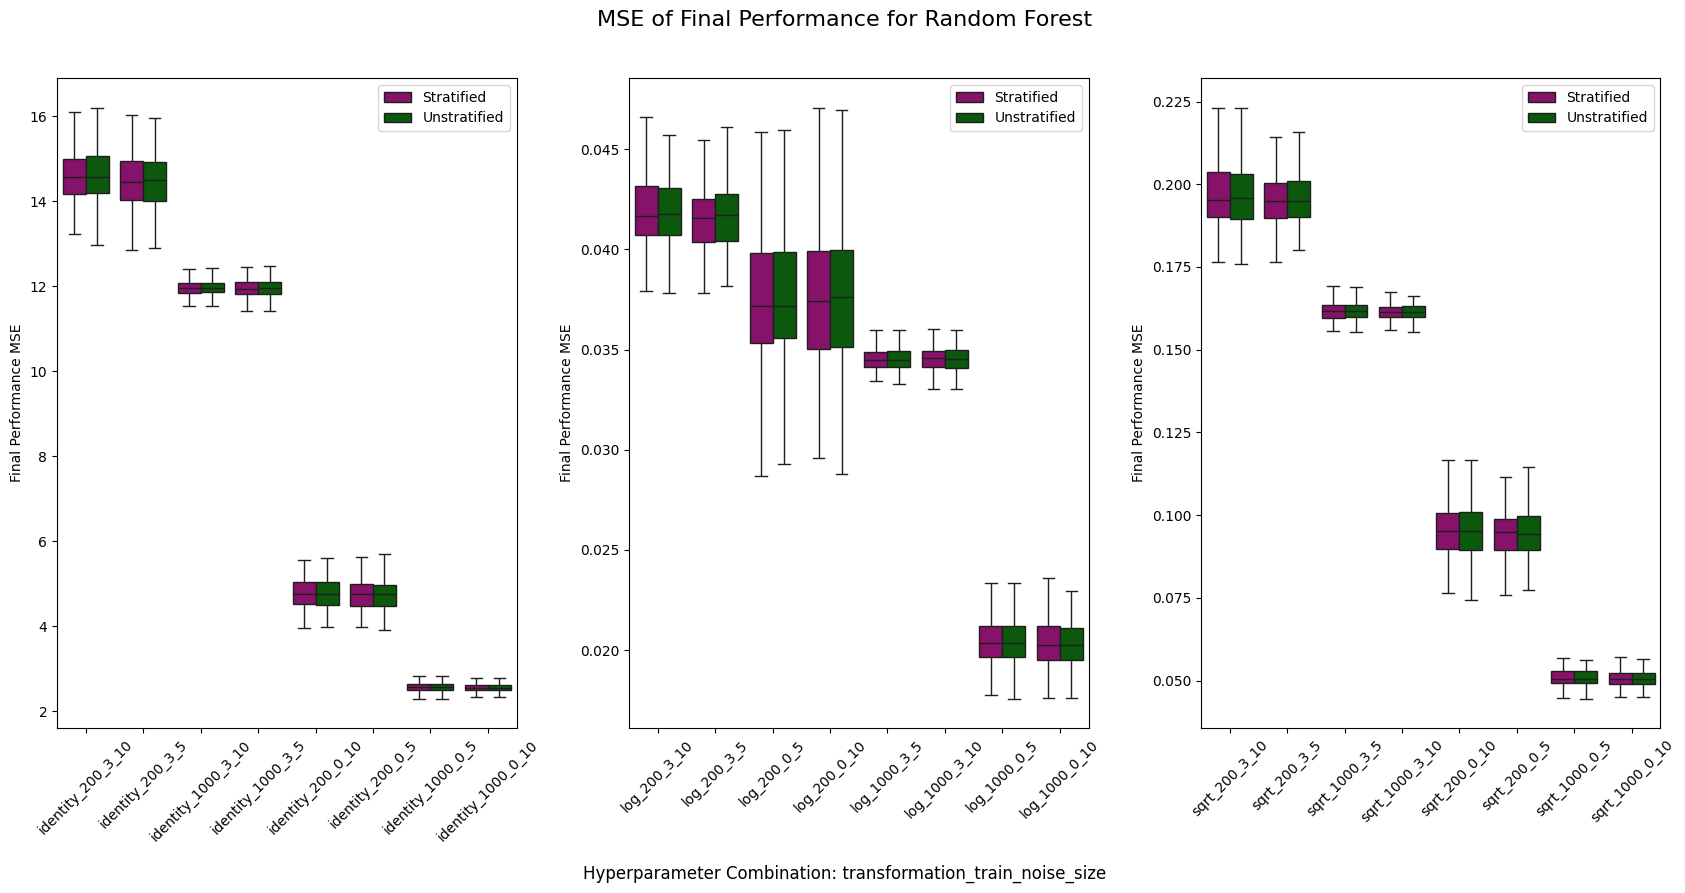

In [58]:
transformations = data['model_info_transformation'].unique()
models = data['model_info_model'].unique()

# rename colum s that startified and unstratified is written at the end
data = data.rename(columns={'stratified_results_test mse': 'MSE_final_perf_stratified', 'unstratified_results_test mse': 'MSE_final_perf_unstratified'}, inplace=False)

    
    # filter data for transformation and model
data_filtered = data[data['model_info_model'] == models[0]]
    # plot
differences_table_all = plot_eval(value_vars= ['MSE_final_perf_stratified', 'MSE_final_perf_unstratified'] , 
                                           value_name = 'Final Performance MSE', 
                                           data = data_filtered, model_vars_title = '_'.join(model_vars_title), nrows=1, ncols=3,
                                           transformations = transformations, model = 'rf')

In [59]:
from tabulate import tabulate

# Assuming your data is stored in a DataFrame called df
latex_table1 = tabulate(differences_table_all, tablefmt="latex_raw", headers="keys", showindex=False)
print(latex_table1)

\begin{tabular}{lrr}
\hline
 Experimental Hyperparameter Combination   &   Difference Mean &   Difference SD \\
\hline
 identity_1000_0_10                        &       0.00231043  &     0.00159154  \\
 identity_1000_0_5                         &      -0.000840918 &    -0.000439592 \\
 identity_1000_3_10                        &      -0.00543627  &    -0.00335442  \\
 identity_1000_3_5                         &       0.00173314  &     0.00795967  \\
 identity_200_0_10                         &      -0.00296037  &    -0.000466466 \\
 identity_200_0_5                          &      -0.000650491 &    -0.00777827  \\
 identity_200_3_10                         &       0.00500057  &     0.0163671   \\
 identity_200_3_5                          &      -0.0131905   &    -0.00172698  \\
 log_1000_0_10                             &       6.52445e-06 &    -5.99035e-07 \\
 log_1000_0_5                              &      -4.484e-07   &    -1.65391e-05 \\
 log_1000_3_10                           

  Experimental Hyperparameter Combination  Difference Mean  Difference SD
3                       identity_1000_3_5         0.038192       0.026224
2                      identity_1000_3_10         0.019491       0.020853
1                       identity_1000_0_5         0.010136       0.012020
7                        identity_200_3_5         0.004468       0.045564
5                        identity_200_0_5        -0.000895       0.014166
4                       identity_200_0_10        -0.002881       0.004485
0                      identity_1000_0_10        -0.007913       0.003494
6                       identity_200_3_10        -0.051725      -0.050925
  Experimental Hyperparameter Combination  Difference Mean  Difference SD
5                             log_200_0_5         0.000107      -0.000041
1                            log_1000_0_5         0.000075       0.000283
3                            log_1000_3_5         0.000049       0.000046
2                           log_1000_3

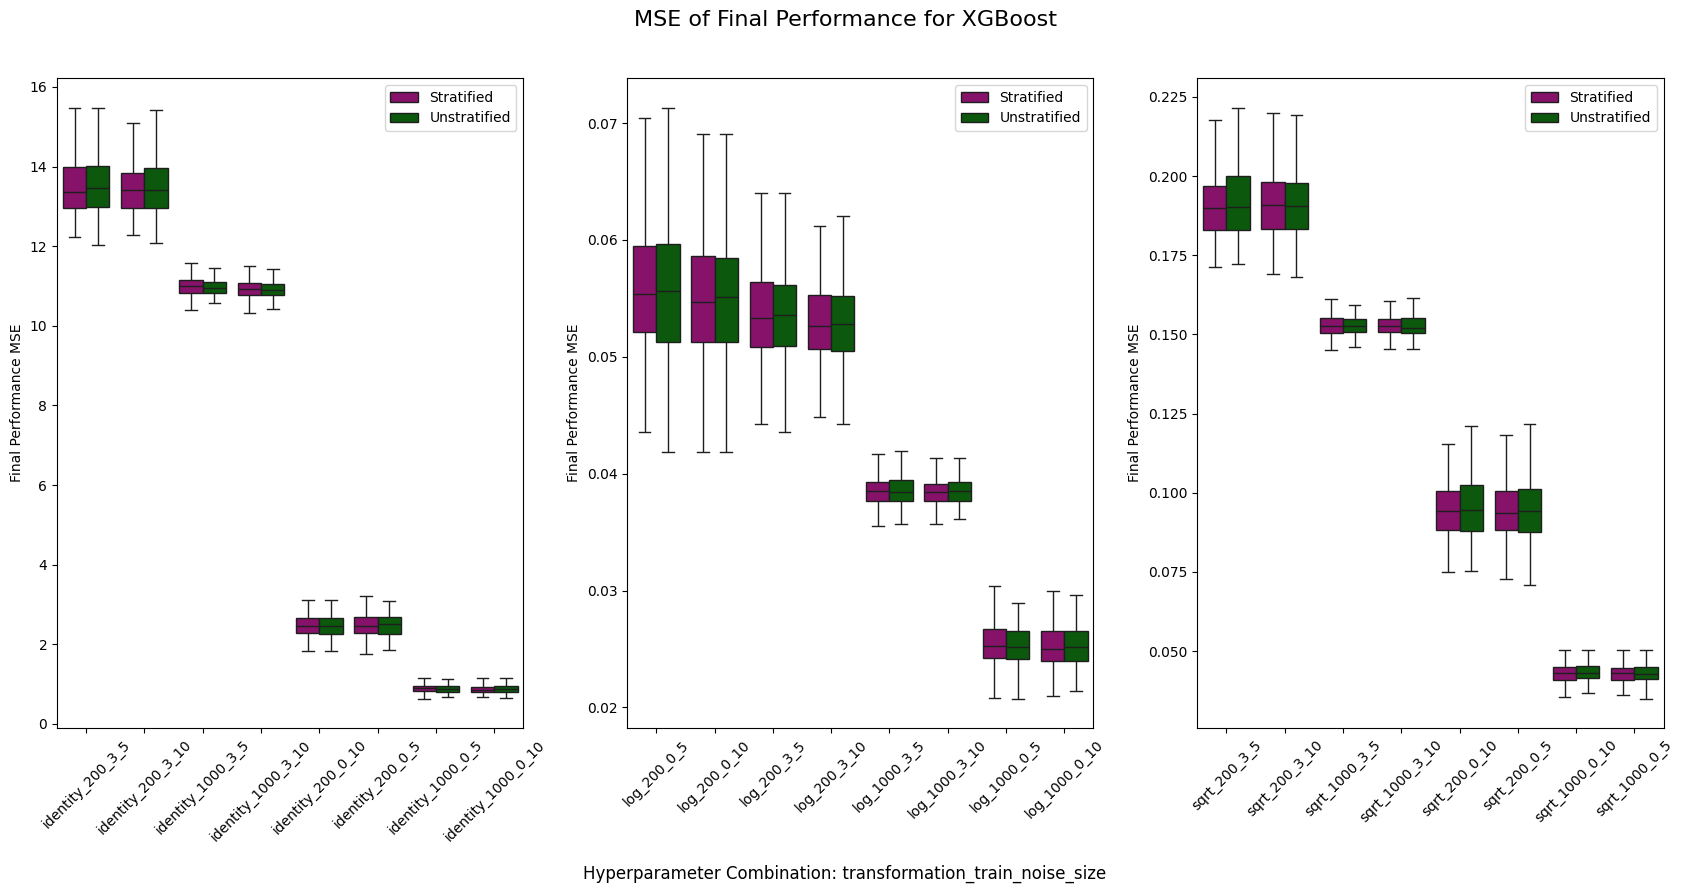

In [60]:

# rename colum s that startified and unstratified is written at the end
data = data.rename(columns={'stratified_results_test mse': 'MSE_final_perf_stratified', 'unstratified_results_test mse': 'MSE_final_perf_unstratified'}, inplace=False)

    
    # filter data for transformation and model
data_filtered = data[data['model_info_model'] == models[1]]
    # plot
differences_table_all = plot_eval(value_vars= ['MSE_final_perf_stratified', 'MSE_final_perf_unstratified'] , 
                                           value_name = 'Final Performance MSE', 
                                           data = data_filtered, model_vars_title = '_'.join(model_vars_title), nrows=1, ncols=3,
                                           transformations = transformations, model = 'xgb')

  Experimental Hyperparameter Combination  Difference Mean  Difference SD
7                        identity_200_3_5         0.000402      -0.000053
2                      identity_1000_3_10         0.000166      -0.000102
4                       identity_200_0_10         0.000124      -0.000020
1                       identity_1000_0_5         0.000035      -0.000018
5                        identity_200_0_5         0.000027      -0.000326
3                       identity_1000_3_5        -0.000053       0.000242
0                      identity_1000_0_10        -0.000097       0.000067
6                       identity_200_3_10        -0.000152       0.000498
  Experimental Hyperparameter Combination  Difference Mean  Difference SD
7                             log_200_3_5         0.001070      -0.000387
4                            log_200_0_10         0.000339       0.000376
6                            log_200_3_10         0.000061      -0.000259
1                            log_1000_

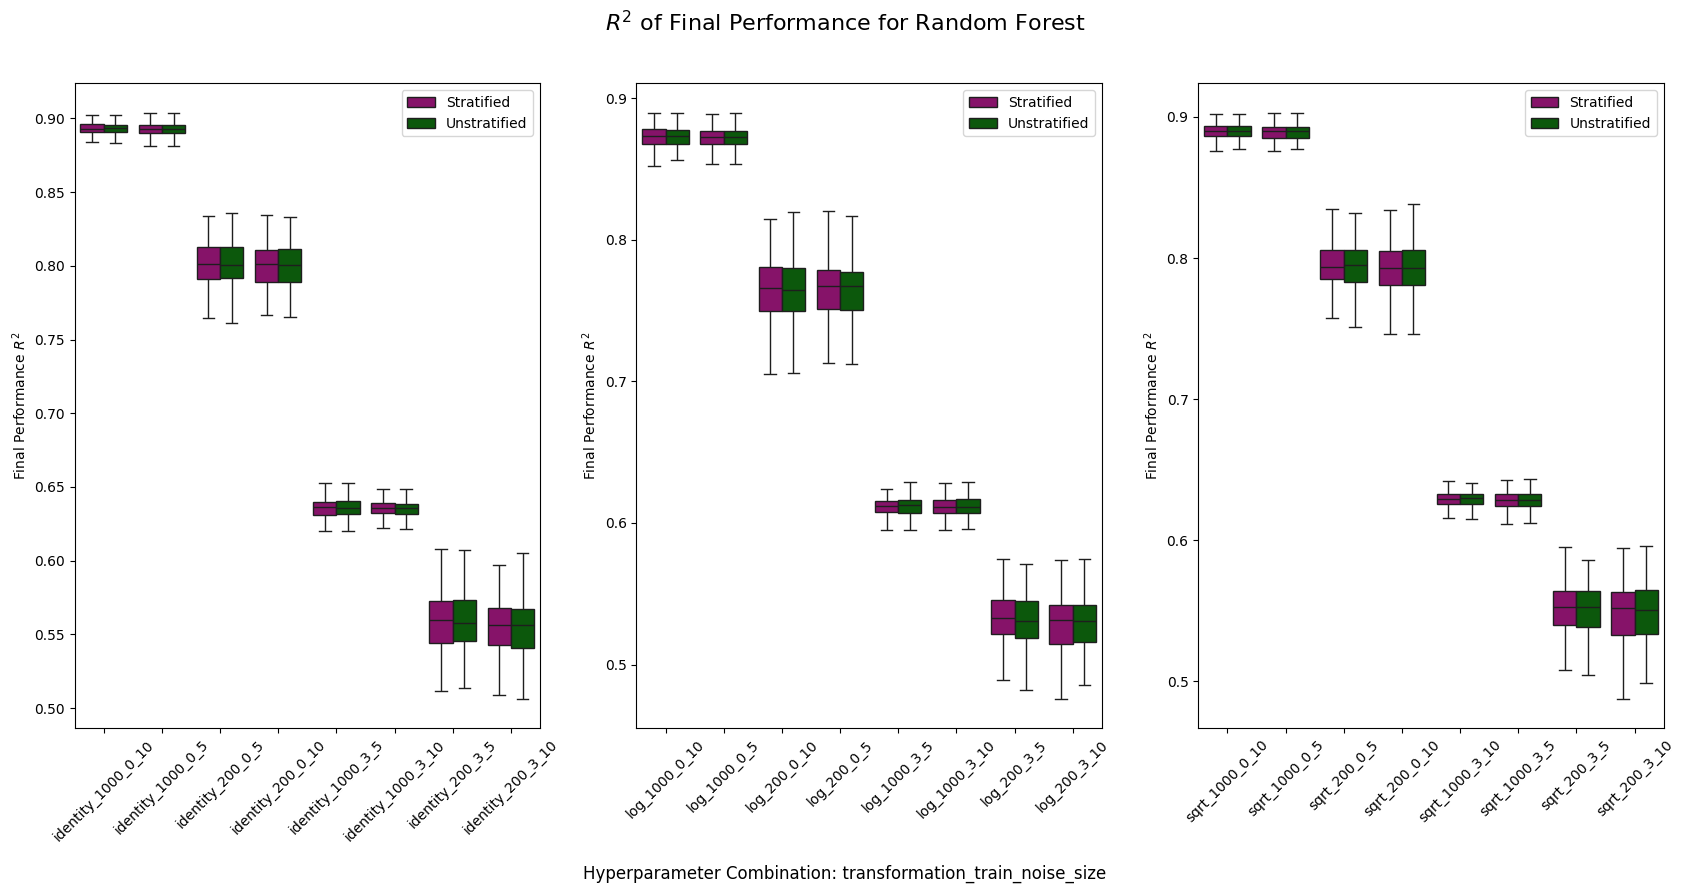

In [63]:

# rename colum s that startified and unstratified is written at the end
data = data.rename(columns={'stratified_results_test r2': 'r2_final_perf_stratified', 'unstratified_results_test r2': 'r2_final_perf_unstratified'}, inplace=False)

    
    # filter data for transformation and model
data_filtered = data[data['model_info_model'] == models[0]]
    # plot
differences_table_all = plot_eval(value_vars= ['r2_final_perf_stratified', 'r2_final_perf_unstratified'] , 
                                           value_name = 'Final Performance $R^2$', 
                                           data = data_filtered, model_vars_title = '_'.join(model_vars_title), nrows=1, ncols=3,
                                           transformations = transformations, model = 'rf', measure = "$R^2$")

  Experimental Hyperparameter Combination  Difference Mean  Difference SD
6                       identity_200_3_10         0.001575      -0.001551
0                      identity_1000_0_10         0.000331       0.000146
4                       identity_200_0_10         0.000121       0.000188
5                        identity_200_0_5         0.000037       0.000593
7                        identity_200_3_5        -0.000136       0.001388
1                       identity_1000_0_5        -0.000425       0.000503
2                      identity_1000_3_10        -0.000594       0.000635
3                       identity_1000_3_5        -0.001163       0.000799
  Experimental Hyperparameter Combination  Difference Mean  Difference SD
7                             log_200_3_5         0.000887       0.000599
4                            log_200_0_10         0.000837      -0.000385
0                           log_1000_0_10         0.000558      -0.000127
6                            log_200_3

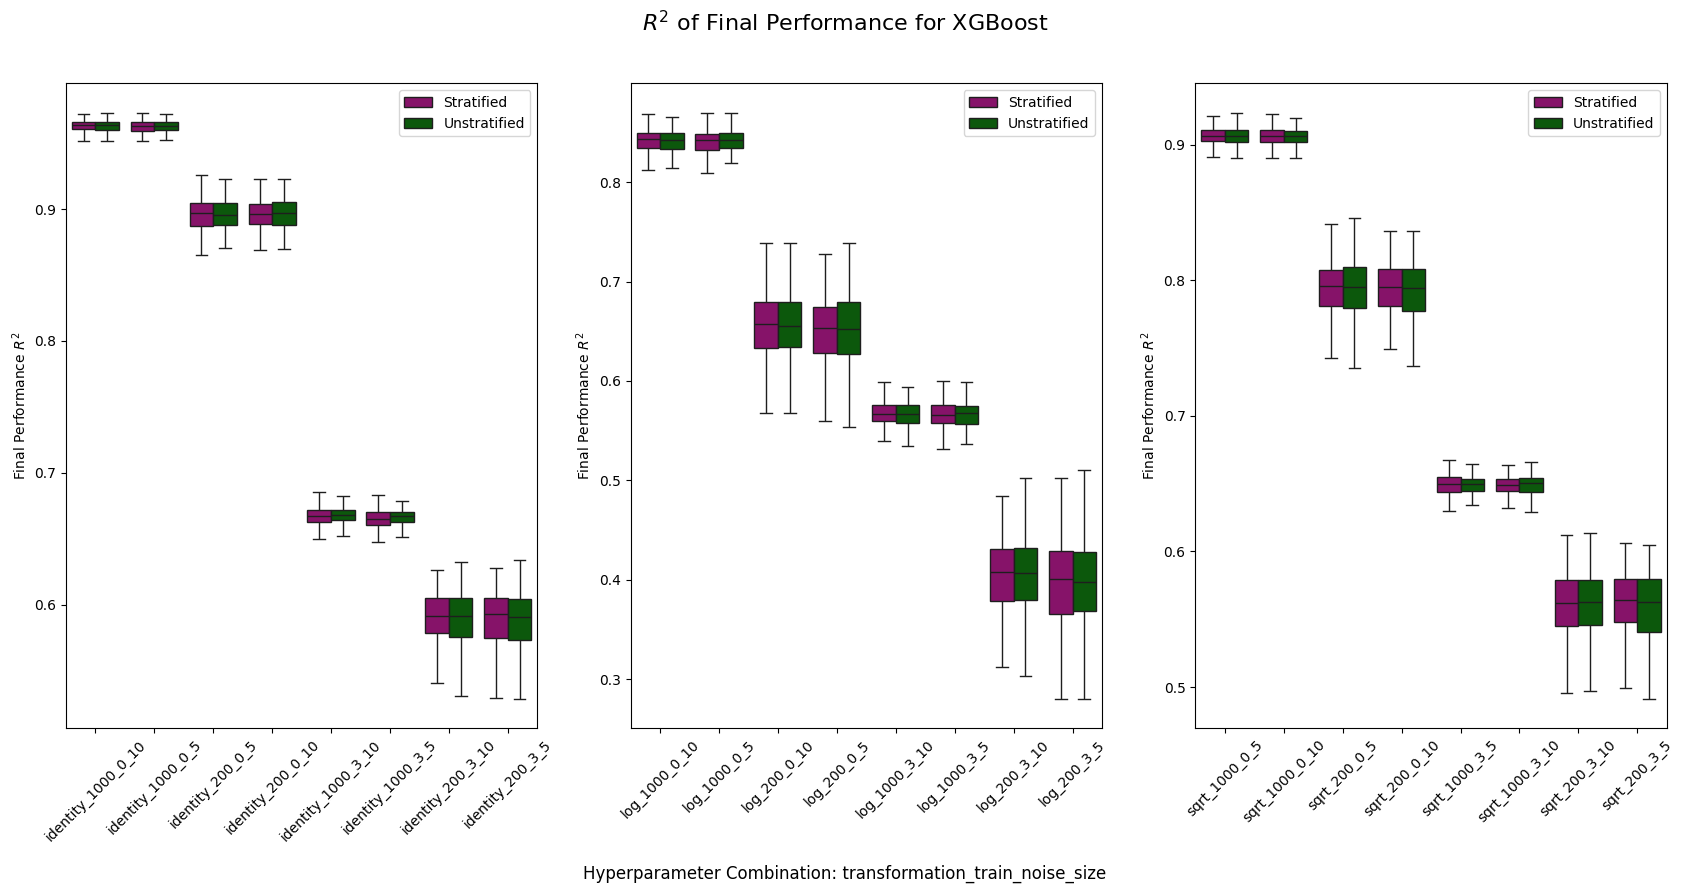

In [66]:
# rename colum s that startified and unstratified is written at the end
data = data.rename(columns={'stratified_results_test r2': 'r2_final_perf_stratified', 'unstratified_results_test r2': 'r2_final_perf_unstratified'}, inplace=False)

    
    # filter data for transformation and model
data_filtered = data[data['model_info_model'] == models[1]]
    # plot
differences_table_all = plot_eval(value_vars= ['r2_final_perf_stratified', 'r2_final_perf_unstratified'] , 
                                           value_name = 'Final Performance $R^2$', 
                                           data = data_filtered, model_vars_title = '_'.join(model_vars_title), nrows=1, ncols=3,
                                           transformations = transformations, model = 'xgb', measure = "$R^2$")